# 用平方损失函数，求导方便L(y,f(x))=(y−f(x))2  f(x)就是y冒

## 1.构建数据集
### $y=2*x$


In [146]:
import numpy as np

In [147]:
X = np.arange(0,50)
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [148]:
# [-5,5]
np.random.seed(1)#定义种子，让我们每次取的随机值都差不多 0-1之间
RandomArray = (np.random.random(50)*2-1)*5 #[-5,5]由来，【0-1】乘以2变成【0-2】,【0-2】减一变成【-1，1】，【-1，1】乘5变成【-5，5】
RandomArray

array([-0.82977995,  2.20324493, -4.99885625, -1.97667427, -3.53244109,
       -4.07661405, -3.13739789, -1.54439273, -1.03232526,  0.38816734,
       -0.80805486,  1.852195  , -2.9554775 ,  3.78117436, -4.72612407,
        1.7046751 , -0.82695198,  0.58689828, -3.59613061, -3.01898511,
        3.00744569,  4.68261576, -1.86575822,  1.92322616,  3.76389152,
        3.94606664, -4.14955789, -4.60945217, -3.3016958 ,  3.78142503,
       -4.01653166, -0.78892375,  4.5788953 ,  0.33165285,  1.91877114,
       -1.84484369,  1.86500928,  3.34625672, -4.81711723,  2.50144315,
        4.88861089,  2.48165654, -2.19556008,  2.89279328, -3.96773993,
       -0.52106474,  4.08595503, -2.06385852, -2.12224661, -3.69971428])

In [149]:
y = 2 * X + RandomArray #加上噪声值
y

array([-0.82977995,  4.20324493, -0.99885625,  4.02332573,  4.46755891,
        5.92338595,  8.86260211, 12.45560727, 14.96767474, 18.38816734,
       19.19194514, 23.852195  , 21.0445225 , 29.78117436, 23.27387593,
       31.7046751 , 31.17304802, 34.58689828, 32.40386939, 34.98101489,
       43.00744569, 46.68261576, 42.13424178, 47.92322616, 51.76389152,
       53.94606664, 47.85044211, 49.39054783, 52.6983042 , 61.78142503,
       55.98346834, 61.21107625, 68.5788953 , 66.33165285, 69.91877114,
       68.15515631, 73.86500928, 77.34625672, 71.18288277, 80.50144315,
       84.88861089, 84.48165654, 81.80443992, 88.89279328, 84.03226007,
       89.47893526, 96.08595503, 91.93614148, 93.87775339, 94.30028572])

In [150]:
import matplotlib.pyplot as plt # pip install matplotlib

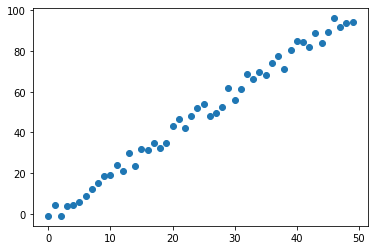

In [151]:
plt.scatter(X,y)

In [152]:
X.shape , y.shape #都是一个一位数组

((50,), (50,))

In [153]:
X = X.reshape(50,1)
y = y.reshape(50,1)


In [154]:
All_data = np.concatenate((X,y),axis=1) #数据集拼接 直接拼接到后面不是我们想要的！！把X和y变成50行一列,默认按行拼接，所以我们要按第二个维度就是按列拼接
All_data

array([[ 0.        , -0.82977995],
       [ 1.        ,  4.20324493],
       [ 2.        , -0.99885625],
       [ 3.        ,  4.02332573],
       [ 4.        ,  4.46755891],
       [ 5.        ,  5.92338595],
       [ 6.        ,  8.86260211],
       [ 7.        , 12.45560727],
       [ 8.        , 14.96767474],
       [ 9.        , 18.38816734],
       [10.        , 19.19194514],
       [11.        , 23.852195  ],
       [12.        , 21.0445225 ],
       [13.        , 29.78117436],
       [14.        , 23.27387593],
       [15.        , 31.7046751 ],
       [16.        , 31.17304802],
       [17.        , 34.58689828],
       [18.        , 32.40386939],
       [19.        , 34.98101489],
       [20.        , 43.00744569],
       [21.        , 46.68261576],
       [22.        , 42.13424178],
       [23.        , 47.92322616],
       [24.        , 51.76389152],
       [25.        , 53.94606664],
       [26.        , 47.85044211],
       [27.        , 49.39054783],
       [28.        ,

### 划分样本为训练集D和测试集V ，一般情况下训练集比测试集要多一倍
#### 4:1 

In [155]:
np.random.shuffle(All_data)#随机打乱数据
All_data

array([[ 5.        ,  5.92338595],
       [29.        , 61.78142503],
       [ 9.        , 18.38816734],
       [22.        , 42.13424178],
       [33.        , 66.33165285],
       [16.        , 31.17304802],
       [49.        , 94.30028572],
       [35.        , 68.15515631],
       [31.        , 61.21107625],
       [36.        , 73.86500928],
       [18.        , 32.40386939],
       [14.        , 23.27387593],
       [ 4.        ,  4.46755891],
       [41.        , 84.48165654],
       [27.        , 49.39054783],
       [48.        , 93.87775339],
       [46.        , 96.08595503],
       [26.        , 47.85044211],
       [47.        , 91.93614148],
       [11.        , 23.852195  ],
       [12.        , 21.0445225 ],
       [ 2.        , -0.99885625],
       [39.        , 80.50144315],
       [21.        , 46.68261576],
       [20.        , 43.00744569],
       [ 6.        ,  8.86260211],
       [30.        , 55.98346834],
       [44.        , 84.03226007],
       [ 0.        ,

In [156]:
train_data = All_data[:40] #训练集取前40个

In [157]:
test_data = All_data[40:]#测试集取剩下的10个

In [158]:
train_data,test_data

(array([[ 5.        ,  5.92338595],
        [29.        , 61.78142503],
        [ 9.        , 18.38816734],
        [22.        , 42.13424178],
        [33.        , 66.33165285],
        [16.        , 31.17304802],
        [49.        , 94.30028572],
        [35.        , 68.15515631],
        [31.        , 61.21107625],
        [36.        , 73.86500928],
        [18.        , 32.40386939],
        [14.        , 23.27387593],
        [ 4.        ,  4.46755891],
        [41.        , 84.48165654],
        [27.        , 49.39054783],
        [48.        , 93.87775339],
        [46.        , 96.08595503],
        [26.        , 47.85044211],
        [47.        , 91.93614148],
        [11.        , 23.852195  ],
        [12.        , 21.0445225 ],
        [ 2.        , -0.99885625],
        [39.        , 80.50144315],
        [21.        , 46.68261576],
        [20.        , 43.00744569],
        [ 6.        ,  8.86260211],
        [30.        , 55.98346834],
        [44.        , 84.032

In [159]:
np.sum(All_data[:,0]*2 - All_data[:,1]) #差16 本身差16 最优就是16 其实就是所有的差距之和 相当于最优损失（我猜的）

16.51220018240119

## SGD算法实现
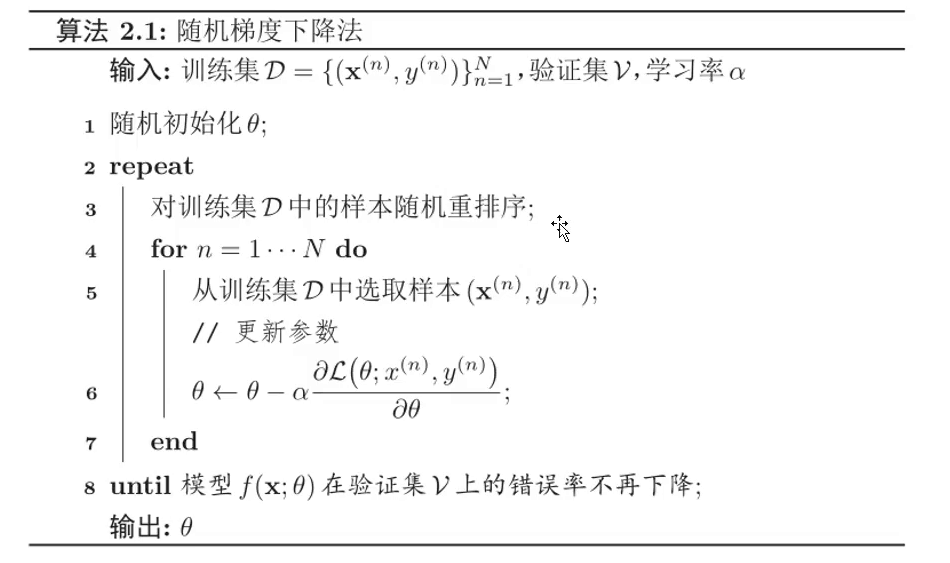

In [160]:
#超参数
lr = 0.00001 #学习率 就是那个学习率α
N = 100
epsilon = 200 #这玩意就是 aibuciteng 小的正数

In [161]:
#参数
theta = np.random.rand() #就是参数Θ
theta 

0.8833060912058098

In [162]:
randint = np.random.randint(0,40) #0到四十随机取一个数
rand_x = train_data[randint][0]
rand_y = train_data[randint][1]
rand_x,rand_y

(26.0, 47.85044211369778)

In [163]:
Num=1
theta_list=[]
loss_list=[]
while True:
    #重新排序 训练集D
    np.random.shuffle(train_data)
    for n in range(N):
        #取随机样本
        randint = np.random.randint(0,40) #0到四十随机取一个数,作为初始点开始进行梯度下降算法
        rand_x = train_data[randint][0]
        rand_y = train_data[randint][1]

        #计算梯度
        grad = rand_x * (rand_x * theta - rand_y) #求导过后的结果
        #更新参数Θ
        theta = theta -lr * grad
    #计算更新theta后的错误率
    X = train_data[:,0]#每行的第一个值(所有的X)
    y = train_data[:,1]#每行的第二个值(所有的y)
    
    loss = np.sum(0.5*((theta*X - y)**2)) #平方损失函数 sum求所有平方损失函数之和
                  
    print("Number: %d ,theta: %f,loss: %f"%(Num,theta,loss))
    Num =Num + 1
    theta_list.append(theta)
    loss_list.append(loss)
    if loss < epsilon:
        break

Number: 1 ,theta: 1.535840,loss: 3644.345716
Number: 2 ,theta: 1.790802,loss: 885.887444
Number: 3 ,theta: 1.914776,loss: 305.387787
Number: 4 ,theta: 1.949432,loss: 232.143129
Number: 5 ,theta: 1.967172,loss: 209.702990
Number: 6 ,theta: 1.986021,loss: 197.028852


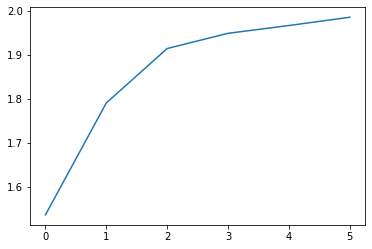

In [164]:
#画图
plt.plot(range(len(theta_list)),theta_list)

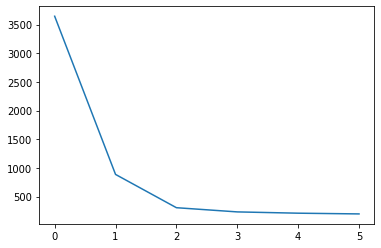

In [165]:
plt.plot(range(len(loss_list)),loss_list)